In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_io as tfio
import numpy as np
import seaborn as sns
import os
from itertools import groupby

In [3]:
def decode_audio(filepath):
    audio = tf.io.read_file(filepath)
    audio, sample_rate = tf.audio.decode_wav(audio, desired_channels = 1)
    audio = tf.squeeze(audio)
    sample_rate = tf.cast(sample_rate, tf.int64)
    audio = tfio.audio.resample(audio, rate_in = sample_rate, rate_out = 16000)
    
    return audio

In [4]:
def preprocess_audio(decoded):
    limit = 40000
    zeroes = 0 if limit - len(decoded) < 0 else limit - len(decoded)
    zeroes = tf.zeros(zeroes)
    
    decoded = tf.concat([zeroes, decoded], axis = 0)
    decoded = decoded[:limit]
    
    spectrogram = tf.signal.stft(decoded, 255, 128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)
    
    return spectrogram

In [5]:
Capuchin_bird = '/kaggle/input/dl-project/FINAL_DIRECTORY/Parsed_Capuchinbird_Clips'
Australian_Brushturkey = '/kaggle/input/dl-project/FINAL_DIRECTORY/Australian_Brushturkey'
Brazilian_Tinamou = '/kaggle/input/dl-project/FINAL_DIRECTORY/Brazilian_Tinamou'
Buff_browed_Chachalaca = '/kaggle/input/dl-project/FINAL_DIRECTORY/Buff-browed_Chachalaca'
Colombian_Chachalaca = '/kaggle/input/dl-project/FINAL_DIRECTORY/Colombian_Chachalaca'

Capuchin_bird_files = tf.io.gfile.glob(Capuchin_bird + '/*.wav')
Australian_Brushturkey_files = tf.io.gfile.glob(Australian_Brushturkey + '/*.wav')
Brazilian_Tinamou_files = tf.io.gfile.glob(Brazilian_Tinamou + '/*.wav')
Buff_browed_Chachalaca_files = tf.io.gfile.glob(Buff_browed_Chachalaca + '/*.wav')
Colombian_Chachalaca_files = tf.io.gfile.glob(Colombian_Chachalaca + '/*.wav')

files = tf.concat([Capuchin_bird_files, Australian_Brushturkey_files,Brazilian_Tinamou_files,Buff_browed_Chachalaca_files,Colombian_Chachalaca_files], axis = 0)

In [6]:
total_Capuchin_bird = len(Capuchin_bird_files)
total_Australian_Brushturkey = len(Australian_Brushturkey_files)
total_Brazilian_Tinamou = len(Brazilian_Tinamou_files)
total_Buff_browed_Chachalaca = len(Buff_browed_Chachalaca_files)
total_Colombian_Chachalaca = len(Colombian_Chachalaca_files)

print(f"Number of files in Capuchin_bird: {total_Capuchin_bird}")
print(f"Number of files in Australian_Brushturkey: {total_Australian_Brushturkey}")
print(f"Number of files in Brazilian_Tinamou: {total_Brazilian_Tinamou}")
print(f"Number of files in Buff_browed_Chachalaca: {total_Buff_browed_Chachalaca}")
print(f"Number of files in Colombian_Chachalaca: {total_Colombian_Chachalaca}")
print(f"Total Number of Files: {len(files)}")

Number of files in Capuchin_bird: 217
Number of files in Australian_Brushturkey: 213
Number of files in Brazilian_Tinamou: 400
Number of files in Buff_browed_Chachalaca: 94
Number of files in Colombian_Chachalaca: 461
Total Number of Files: 1385


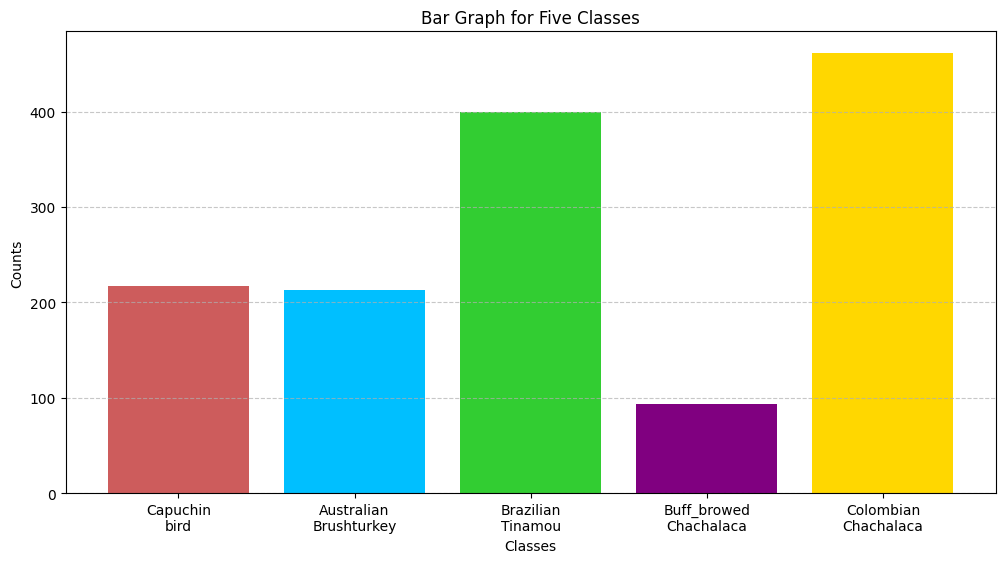

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Sample data for five classes and their counts
classes = ["Capuchin\nbird", "Australian\nBrushturkey", "Brazilian\nTinamou", "Buff_browed\nChachalaca", "Colombian\nChachalaca"]
class_counts = [total_Capuchin_bird, total_Australian_Brushturkey,total_Brazilian_Tinamou,total_Buff_browed_Chachalaca,total_Colombian_Chachalaca]

# Create a bar graph
plt.bar(classes, class_counts, color=['indianred', 'deepskyblue', 'limegreen', 'purple', 'gold'])

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Bar Graph for Five Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.show()


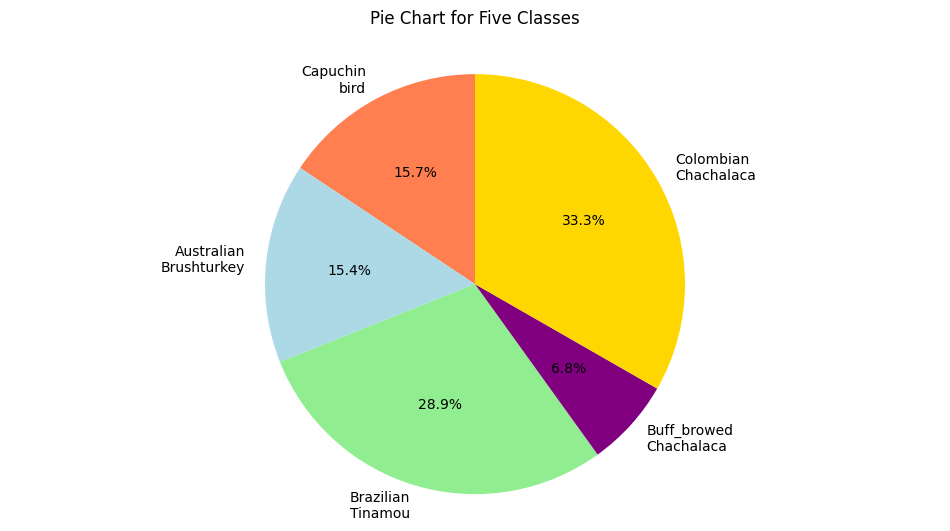

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Sample data for five classes and their sizes (in percentages)
classes = ["Capuchin\nbird", "Australian\nBrushturkey", "Brazilian\nTinamou", "Buff_browed\nChachalaca", "Colombian\nChachalaca"]
class_counts = [total_Capuchin_bird, total_Australian_Brushturkey,total_Brazilian_Tinamou,total_Buff_browed_Chachalaca,total_Colombian_Chachalaca]

# Define colors for the pie chart
colors = ['coral', 'lightblue', 'lightgreen', 'purple', 'gold']

# Create a pie chart
plt.pie(class_counts, labels=classes, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart for Five Classes\n')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.
plt.show()


In [7]:
def get_label(filepath):
    parts = tf.strings.split(input=filepath,sep=os.path.sep)
    return parts[-2]

def decode_and_label(filepath):
    label = get_label(filepath)
    decoded_audio = decode_audio(filepath)
    
    return decoded_audio, label

In [8]:
files_data = tf.data.Dataset.from_tensor_slices(files)
labelled_and_decoded_data = files_data.map(decode_and_label)

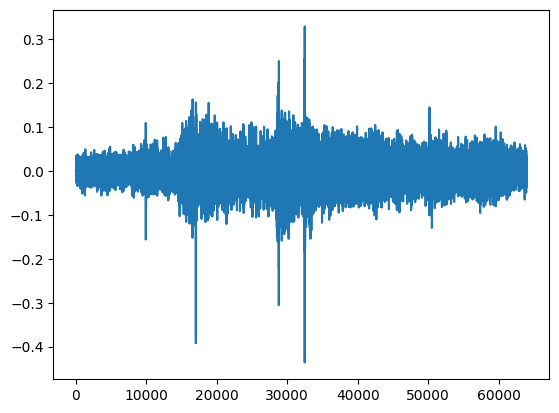

In [9]:
for i, (audio, label) in enumerate(labelled_and_decoded_data.take(1)):
    plt.plot(audio)

In [10]:
def preprocess_and_label(decoded, label):
    decoded_label = tf.argmax(label == ['Capuchin_bird','Australian_Brushturkey','Brazilian_Tinamou','Buff_browed_Chachalaca','Colombian_Chachalaca'])
    preprocessed_audio = preprocess_audio(decoded)
    return preprocessed_audio, decoded_label

In [11]:
data = labelled_and_decoded_data.map(preprocess_and_label)

tf.Tensor([311 129   1], shape=(3,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int64)


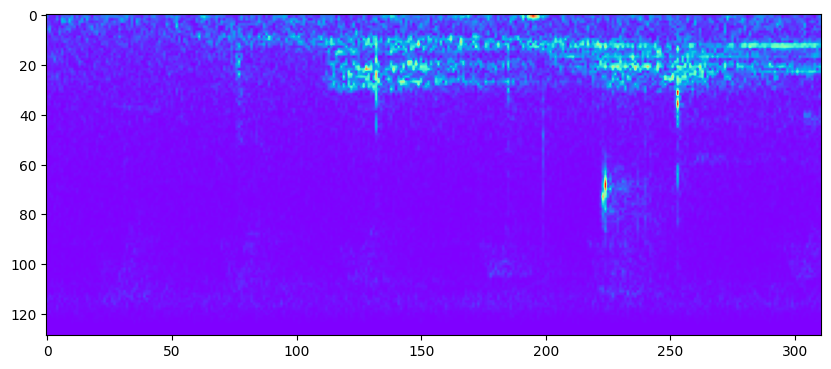

In [12]:
plt.figure(figsize = (10, 20))
for i, (spectrogram, label) in enumerate(data.take(1)):
    plt.imshow(tf.transpose(spectrogram)[0], cmap = 'rainbow')
    print(tf.shape(spectrogram))
    print(label)

In [13]:
data = data.shuffle(10000)
test_len = int(len(data) * 0.2)

test_data = data.take(test_len)
train_data = data.skip(test_len)

In [14]:
print("Shape of Train_data : ",len(train_data))
print("Shape of Test_data : ",len(test_data))

Shape of Train_data :  1108
Shape of Test_data :  277


In [15]:
train_data = data.skip(test_len).batch(32)

In [46]:
len(train_data)

35

In [16]:
def return_only_spectrogram(spectrogram, label):
    return spectrogram

In [17]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(data = data.map(return_only_spectrogram))

In [18]:
for spectrogram, _ in data.take(1):
    input_shape = spectrogram.shape
print('Input shape:', input_shape)

Input shape: (311, 129, 1)


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    
    norm_layer,
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(16, (3, 3)),
    
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(16, (3, 3)),
    
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(5),
    
])


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 311, 129, 1)      3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 309, 127, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 307, 125, 32)      18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 305, 123, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 36, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 97, 36, 32)        0

In [20]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
)

In [22]:
history = model.fit(train_data, epochs=30, callbacks=[early_stopping])

Epoch 1/30
35/35 [==============================] - 156s 4s/step - loss: 1.3048 - accuracy: 0.4179
Epoch 2/30
35/35 [==============================] - 152s 4s/step - loss: 0.9163 - accuracy: 0.6047
Epoch 3/30
35/35 [==============================] - 152s 4s/step - loss: 0.8276 - accuracy: 0.6742
Epoch 4/30
35/35 [==============================] - 152s 4s/step - loss: 0.7227 - accuracy: 0.7094
Epoch 5/30
35/35 [==============================] - 152s 4s/step - loss: 0.6853 - accuracy: 0.7319
Epoch 6/30
35/35 [==============================] - 151s 4s/step - loss: 0.5829 - accuracy: 0.7807
Epoch 7/30
35/35 [==============================] - 151s 4s/step - loss: 0.4955 - accuracy: 0.8060
Epoch 8/30
35/35 [==============================] - 150s 4s/step - loss: 0.4183 - accuracy: 0.8493
Epoch 9/30
35/35 [==============================] - 151s 4s/step - loss: 0.5693 - accuracy: 0.7852
Epoch 10/30
35/35 [==============================] - 152s 4s/step - loss: 0.4642 - accuracy: 0.8186
Epoch 11/

In [50]:
history.history['loss']

[1.3048458099365234,
 0.9162821769714355,
 0.8276207447052002,
 0.7226935625076294,
 0.6853328943252563,
 0.582890510559082,
 0.4955059885978699,
 0.4182860851287842,
 0.5692532658576965,
 0.46421873569488525,
 0.3999359905719757,
 0.3259192705154419,
 0.4338766038417816,
 0.34162208437919617,
 0.32558679580688477,
 0.37517616152763367,
 0.25646480917930603,
 0.2353678196668625,
 0.24882644414901733,
 0.22969582676887512,
 0.1753092259168625,
 0.2597689628601074,
 0.5082470178604126,
 0.5601698160171509,
 0.445879191160202,
 0.2874601483345032]

In [29]:
accuracy=history.history['accuracy']
loss=history.history['loss']

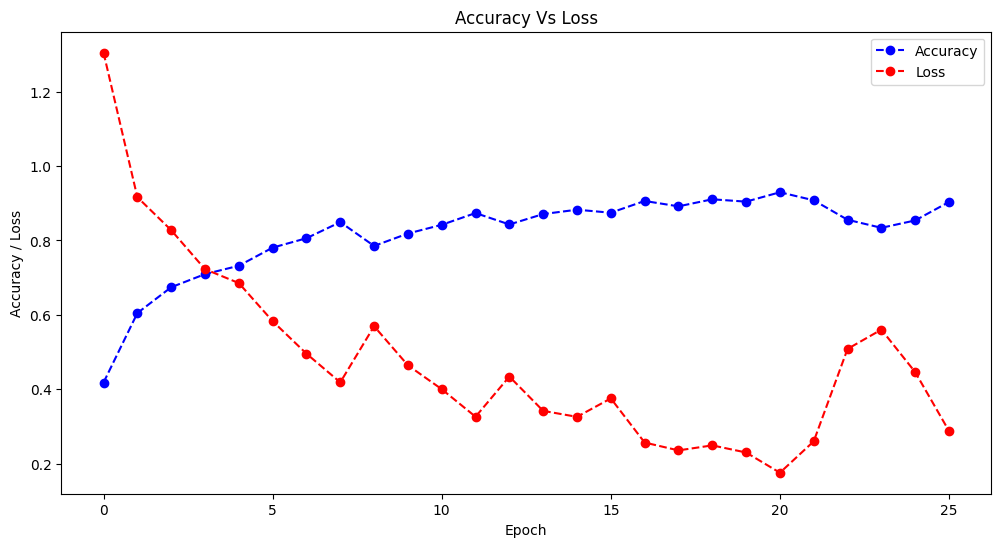

In [30]:
import matplotlib.pyplot as plt

# Assuming you already have 'loss' and 'accuracy' lists
# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy and loss on the same graph
plt.plot(accuracy, 'bo--', label='Accuracy')
plt.plot(loss, 'ro--', label='Loss')

plt.title('Accuracy Vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()

# Show the plot
plt.show()


In [31]:
model.evaluate(test_data.batch(10))

28/28 [==============================] - 12s 244ms/step - loss: 0.1340 - accuracy: 0.9531


[0.13400381803512573, 0.9530686140060425]

In [34]:
test_audio = []
test_labels = []

for audio, label in test_data:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

print(np.shape(test_audio))
print(np.shape(test_labels))

(277, 311, 129, 1)
(277,)


In [35]:
test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

y = model.predict(test_audio)
y_pred = np.argmax(y, axis=1)
y_true = test_labels

print(np.shape(y_pred))
print(np.shape(y_true))

9/9 [==============================] - 7s 771ms/step
(277,)
(277,)


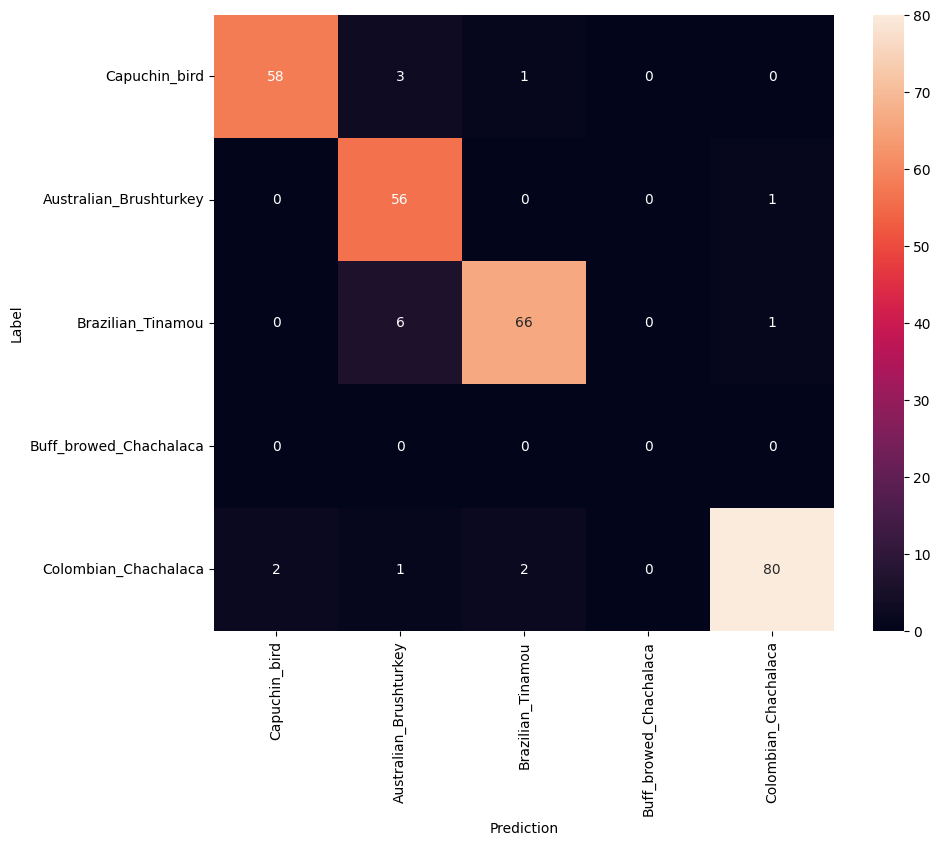

In [36]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
commands = ['Capuchin_bird','Australian_Brushturkey','Brazilian_Tinamou','Buff_browed_Chachalaca','Colombian_Chachalaca']
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [37]:
forest_recordings = '/kaggle/input/dl-project/FINAL_DIRECTORY/Forest Recordings'
forest_recordings_files = os.listdir(forest_recordings)

In [38]:
forest = len(forest_recordings_files)
print(f"Number of files in Forest Recording: {forest}")

Number of files in Forest Recording: 100


In [39]:
forest_recs_full_paths = []
for file in forest_recordings_files:
    full_path = '/kaggle/input/dl-project/FINAL_DIRECTORY/Forest Recordings' + f'/{file}'
    forest_recs_full_paths.append(full_path)

In [40]:
# filepath = "/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings/recording_00.mp3"
def predict_forest_rec(filepath):
    audio = tfio.audio.AudioIOTensor(filepath)
    sample_rate = audio.rate

    audio = audio.to_tensor()
    audio = tf.math.reduce_sum(audio, axis = 1) / 2

    sample_rate = tf.cast(sample_rate, tf.int64)
    audio = tfio.audio.resample(audio, rate_in = sample_rate, rate_out = 16000)

    slices = tf.keras.utils.timeseries_dataset_from_array(audio, audio, 
                                                          sequence_length = 40000, 
                                                          sequence_stride = 40000, 
                                                          batch_size = 1)
    audio_slices = []
    for (data, index) in slices:
        audio_slices.append(tf.squeeze(data))

    audio_spectrograms = []
    for audio_slice in audio_slices:
        spectrogram = tf.signal.stft(audio_slice, 255, 128)
        spectrogram = tf.abs(spectrogram)
        spectrogram = tf.expand_dims(spectrogram, axis = 2)
        audio_spectrograms.append(spectrogram)

    y = model.predict(np.array(audio_spectrograms))
    y_pred = np.argmax(y, axis=1)

    predictions = []
    for i, group in groupby(y_pred):
        predictions.append(i)
        
    return predictions

In [41]:
forest_predictions = []

# List to store the counts of ones for each iteration
count_zero_list = []

# Iterate through the list of file paths
for file in forest_recs_full_paths[:]:  # Adjust the number as needed
    pred = predict_forest_rec(file)  # Assuming predict_forest_rec is a function that makes predictions
    forest_predictions.append(pred)
   
    # Count the number of ones in the prediction (assuming '1' is a positive prediction)
    count_zero = pred.count(0)
    count_zero_list.append(count_zero)

3/3 [==============================] - 2s 540ms/step


In [43]:
# The forest_predictions list now contains the predictions for each file
print("Forest Predictions:", forest_predictions)

# The count_ones_list contains the counts of ones for each iteration
print("Count of Zero in Each Iteration:", count_zero_list)

Forest Predictions: [[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1, 0, 4, 1, 4, 0, 1, 0, 1, 4, 1, 0, 4, 0, 4, 0, 4, 1, 4], [2], [1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2], [1, 0, 2, 1], [2, 0, 1, 4, 1, 2, 0, 2, 1, 2, 1, 4, 2, 0, 2, 0, 2, 0, 2, 4, 2, 1, 4, 1, 2, 0, 2, 0, 1, 0, 1, 4, 1, 0, 2, 1, 4, 1, 4, 2, 0, 1, 0, 4, 0], [0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 4, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1], [1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1], [1, 0, 1, 0, 1, 0, 1], [4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 0, 4, 0, 1, 0, 1, 4, 1, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], [2, 0, 4, 0, 2, 0, 2, 4, 0, 4, 1, 4, 2, 4, 2, 0, 2, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 4, 1, 4, 2, 0, 2, 4, 2, 0, 2, 4, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], [2, 4, 2, 4, 2, 0, 2, 1, 2, 4, 2, 0, 4, 0, 4, 0, 4, 2, 0, 4], [1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1], [4, 2, 4, 2, 4, 2, 4, 2, 4, 2

In [44]:
import pandas as pd

# Assuming you have a list of filenames corresponding to the forest_recs_full_paths
file_names = [file.split('/')[-1] for file in forest_recs_full_paths[:]]

# Create a DataFrame
data = {'Filename': file_names, 'Frequency of Capuchinbird Sound': count_zero_list}
df = pd.DataFrame(data)

# Display the DataFramQe
print(df)


            Filename  Frequency of Capuchinbird Sound
0   recording_76.mp3                               13
1   recording_62.mp3                                0
2   recording_48.mp3                                5
3   recording_44.mp3                                1
4   recording_45.mp3                               12
..               ...                              ...
95  recording_97.mp3                               18
96  recording_50.mp3                                0
97  recording_71.mp3                                7
98  recording_34.mp3                               13
99  recording_00.mp3                               11

[100 rows x 2 columns]


In [45]:
output_path = '/kaggle/working/forest_predictions.csv'
df.to_csv(output_path, index=False)